### Kagome lattice

In [13]:
import numpy as np
import numpy.linalg as lng
import matplotlib.pyplot as plt


In [4]:
l_cell = 20
n_cell = l_cell**2
n_sites = 3*n_cell
hopping = 1.0 

In [5]:
### class to define the hamiltonian
class lattice:
    def __init__(self,l_cell,n_cell,hopping,n_sites):
        '''
        This function will initialize the object and set the
        parameters:
        parameters:
            self(object): object
            l_cell(int):  number of unit cell
            n_cell(int): total number of unit cells
            hopping(float): nn nearest neighbour hopping
        '''
        self.l_cell = l_cell
        self.n_cell = n_cell
        self.hopping = hopping
        self.n_sites = n_sites
    
    ## this function will create the square lattice for 
    ## the unit cells
    def neighbour(self):
        '''
        This function will create the neighbour table with
        periodic boundary conditions
        parameters:
            None
        return:
            None
        '''
        sip = lambda x:(x+1)%self.l_cell
        sim = lambda x:(x-1+self.l_cell)%self.l_cell
        ri , li , ui , di,rui,dli = [],[],[],[],[],[]
        for j in range(n_cell):
            yi,xi = divmod(j,self.l_cell)
            ri.append(sip(xi)+yi*self.l_cell)
            li.append(sim(xi)+yi*self.l_cell)
            ui.append(xi+sip(yi)*self.l_cell)
            di.append(xi+sim(yi)*self.l_cell)
            rui.append(sip(xi)+sip(yi)*self.l_cell)
            dli.append(sim(xi)+sim(yi)*self.l_cell)
        self.right = np.array(ri,dtype='int')
        self.left = np.array(li,dtype='int')
        self.up = np.array(ui,dtype='int')
        self.down = np.array(di,dtype='int')
        self.right_up = np.array(rui,dtype='int')
        self.left_down = np.array(dli,dtype='int')


In [16]:
## defining the class for the hamiltonian 
## it uses lattice as the parent class
class Hamiltonian(lattice):
    ## initializing the object
    def __init(self,l_cell,n_cell,hopping,n_sites):
        
        ## using init of the parent class
        super(Hamiltonian,self).__init__(l_cell,n_cell,hopping,n_sites)
        
    ## construct the hamiltonian matrix
    def haminitialize(self):
        hammat = np.zeros((n_sites,n_sites))

        for i in range(self.n_cell):
            ri = self.right[i]
            li = self.left[i]
            ui = self.up[i]
            di = self.down[i]
            rui = self.right_up[i]
            ldi = self.left_down[i]
            
            ## setting the bonds inside the unit cell
            hammat[3*i,(3*i)+1] = self.hopping
            hammat[(3*i)+1,3*i] = self.hopping
            hammat[3*i,(3*i)+2] = self.hopping
            hammat[(3*i)+2,3*i] = self.hopping
            
            ### setting up the bonds outside the unitcell
            ## for the 1st site in the unitcell
            hammat[3*i,(3*li)+1] = -self.hopping
            hammat[(3*li)+1,3*i] = -self.hopping
            
            hammat[3*i,(3*ldi)+2] = -self.hopping
            hammat[(3*ldi)+2,3*i] = -self.hopping
            
            ## for the 2nd site in the unit cell
            hammat[(3*i)+1,3*ri] = -self.hopping
            hammat[3*ri,(3*i)+1] = -self.hopping
            
            hammat[3*i,(3*di)+2] = -self.hopping
            hammat[(3*di)+2,3*i] = -self.hopping
            
            ## for the 3rd site in the unit cell
            hammat[(3*i)+2,(3*rui)] = -self.hopping
            hammat[3*rui,(3*i)+2] = -self.hopping
            
            hammat[(3*i)+2,(3*ui)+1] = -self.hopping
            hammat[(3*ui)+1,(3*i)+2] = -self.hopping
        self.ham = hammat
        
    ### diagonalize the hamiltonian
    def diag(self):
        '''
        This function will diagonalize the hamiltonian
        parameters:
            self(object): Instance of the class
        return:
            evals (float): Eigenvalues of the hamiltonian
            evecs(float): eigenvectors of the hamiltonian
        '''
        evals,evecs = lng.eig(self.ham)
        return evals,evecs
        

In [17]:
### create an instance of the class
ham = Hamiltonian(l_cell,n_cell,hopping,n_sites)

## set up the neighbour table
ham.neighbour()


## initialize the hamiltonian
ham.haminitialize()


## diagonalize the hamiltonian
evls,evecs = ham.diag()

In [9]:
exct_result = np.loadtxt('Eigval_kagome_tb.dat',delimiter='\t')


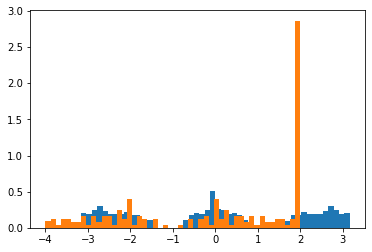

In [15]:
plt.hist(evls.real,density=1,bins=50)
plt.hist(exct_result, density=1, bins=50)
plt.show()


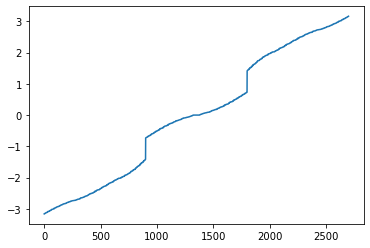

In [89]:
plt.plot(np.sort(evls.real))
plt.show()

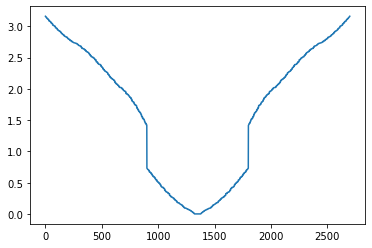

In [90]:
plt.plot(abs(np.sort(evls.real)))
plt.show()

In [ ]:
evls